In [28]:
import openai
from dotenv import find_dotenv, load_dotenv
from youtube_transcript_api import YouTubeTranscriptApi
import streamlit as st
from langchain import OpenAI
from langchain.docstore.document import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains.summarize import load_summarize_chain
from langchain.prompts import PromptTemplate
import os

current_directory = os.getcwd()
load_dotenv(current_directory + '/conf.env')

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

def inner_vector_product(vector_1, vector_2):
    """
    This function calculates the inner vector product of two vectors.
    """
    import numpy as np
    a = np.array(vector_1)
    b = np.array(vector_2)

    return np.dot(a, b)

In [29]:
# Download sample video transcript
transcript = YouTubeTranscriptApi.get_transcript('CR8Niz9DrWU&t=6s')
res = ''
for txt in transcript:
    res += ' ' + txt['text']

with open(current_directory + '/interview_1.txt', 'w', encoding='utf-8') as interview:
    interview.write(res)  

In [30]:
def generate_response(txt):
    # Instantiate the LLM model
    llm = OpenAI(temperature = 0.0, 
                 openai_api_key = OPENAI_API_KEY)
    
    # Split text
    text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 4000,
    chunk_overlap  = 20,
    length_function = len,
    add_start_index = True,)
    
    texts = text_splitter.split_text(txt)
    # Create multiple documents
    docs = [Document(page_content=t) for t in texts]
    # Text summarization
    chain = load_summarize_chain(llm, chain_type='map_reduce')
    return chain.run(docs)

summerized_text = generate_response(res)

In [31]:
INTERVIEW_QUESTION_PROMPT = """ We asked a candidate an interview question of {interview_question}. 
Here is the sumerized response: {candidate_response} 

Question : How do you evaluate the candidate's response?

Instructions:

1) The story should be specific about an industrial project in the domain of 
   engineering product or marketing.
2) The story should be clear and easy to understand.
3) The story should be concise and to the point.
4) The story should be relevant to the question.

Please use the following template for your response :

Your general ranking should be only one of these choices:
1) weak, 
2) average, 
3) strong

With the Explanation of your ranking:"""

In [32]:
prompt_template = PromptTemplate(
    input_variables =["candidate_response", "interview_question"],
    template = INTERVIEW_QUESTION_PROMPT
)

query = prompt_template.format(
        candidate_response = summerized_text,
        interview_question = "Tell me about the time that you solved a customer's problem"
    )

In [33]:
llm = OpenAI(temperature = 0.0, openai_api_key = OPENAI_API_KEY)
#print(llm(query))

In [34]:
LEADERSHIP_PRINCIPLES ={ "CUSTOMER_OBSESSION" : """"
The core factor in the leadership principle of "Customer Obsession" is an unwavering commitment to prioritizing the customer above 
all else. This principle emphasizes understanding customer needs and preferences to guide decision-making. It places the customer at 
the center of all operations, striving to exceed expectations and adapt to changing needs. This approach fosters a customer-centric 
culture focused on delivering exceptional value and experiences. Customer feedback is valued, and promises are consistently delivered. 
Embracing customer obsession builds loyalty, fosters trust, and differentiates organizations in competitive markets. It fuels innovation, 
ensuring that products and services remain relevant. Ultimately, it is a foundational principle for long-term business success and growth.
""", 
"OWNERSHIP" : """
The primary factor in the leadership principle of "Ownership" is the sense of responsibility and accountability that individuals take for 
their work and decisions. It encourages a mindset where individuals treat their tasks and projects as if they are the owners, demonstrating 
a strong commitment to achieving success and driving outcomes.
Ownership involves proactively taking initiative, being self-motivated, and seeing tasks through to completion. It means not just doing 
the work assigned but also taking the necessary steps to ensure that it is done effectively and efficiently.
This principle promotes a culture of autonomy, where individuals are empowered to make decisions and take actions that align with the 
organization's goals and mission. It emphasizes the importance of personal investment in one's work and a dedication to delivering 
quality results.
By embracing ownership, organizations can achieve higher levels of productivity, innovation, and accountability. It creates a sense 
of pride and fulfillment among employees, contributing to a positive and proactive work environment. Ultimately, ownership is a 
fundamental principle for achieving excellence and driving organizational success.
"""
,"INVENT_AND_SIMPLIFY" : """
The primary factor in the leadership principle of "Invent and Simplify" is the drive to foster innovation and streamline processes. 
It encourages individuals and teams to constantly seek new, creative solutions and to eliminate unnecessary complexities.
"Invent and Simplify" promotes a culture of continuous improvement and innovation, where individuals are empowered to challenge 
the status quo and come up with novel ideas. It emphasizes the importance of finding simpler, more efficient ways to achieve goals 
and deliver value.
This principle highlights the value of simplicity in design, processes, and decision-making. It encourages individuals to prioritize 
clarity, ease of use, and efficiency in all aspects of their work.
By embracing "Invent and Simplify," organizations can drive innovation, reduce waste, and enhance the customer experience. It creates 
an environment where individuals are motivated to find better solutions and are not content with the status quo. Ultimately, 
this principle is instrumental in promoting agility, cost-effectiveness, and excellence within an organization.
"""
,"BIAS_FOR_ACTION" : """
The core factor in the leadership principle of "Bias for Action" is the relentless pursuit of decisiveness and proactivity. It emphasizes 
the importance of taking prompt and informed action over deliberation or inaction.
"Bias for Action" encourages individuals and teams to make timely decisions and to prioritize tasks that drive results swiftly. It 
promotes a culture of urgency where opportunities are seized, and challenges are met head-on.
This principle advocates calculated risk-taking, where individuals are encouraged to make thoughtful decisions, even if there is 
uncertainty, and to learn from both successes and failures.
By embracing a "Bias for Action," organizations can foster agility, adaptability, and a competitive edge. It empowers individuals 
to be proactive problem-solvers, driving innovation and growth. Ultimately, this principle underscores the importance of action as 
a catalyst for progress and achievement in a dynamic and fast-paced environment.
"""
,"EARN_TRUST" : """
The pivotal factor in the leadership principle of "Earn Trust" is the unwavering commitment to building and maintaining trust among all 
stakeholders. It underscores the importance of honesty, integrity, and reliability in all interactions and decisions.
"Earn Trust" emphasizes transparency in communication, openness to feedback, and the fulfillment of commitments. It promotes a 
culture where trust is considered invaluable, and individuals consistently deliver on their promises and responsibilities.
This principle recognizes that trust is the foundation of strong relationships, whether with customers, colleagues, partners, 
or the broader community. It encourages individuals to act ethically and responsibly, knowing that trust is hard-earned but easily lost.
By embracing "Earn Trust," organizations can build lasting credibility, foster loyalty, and enhance their reputation. It creates 
an environment where trust is upheld as a fundamental value, enabling individuals and organizations to thrive in an atmosphere of 
mutual respect and integrity. Ultimately, this principle is instrumental in establishing and maintaining successful and enduring 
relationships.
"""
,"LEARN_AND_BE_CURIOUS" : """ The leadership principle "Learn and Be Curious" emphasizes the paramount importance of intellectual 
curiosity and a continuous thirst for knowledge. The most crucial factor within this principle is the cultivation of a growth mindset, 
where individuals are inherently motivated to expand their horizons, seek new insights, and enhance their understanding of the world 
around them.
By fostering a culture of curiosity, individuals not only remain adaptable in an ever-evolving landscape but also drive innovation 
and excellence in their work. They actively explore new ideas, question assumptions, and embrace learning opportunities. This mindset 
not only propels personal and professional growth but also contributes to a dynamic and forward-thinking environment that encourages 
collaboration, problem-solving, and creative thinking.
In essence, the key factor in "Learn and Be Curious" is the unwavering commitment to nurturing a mindset that values continuous 
learning and exploration, recognizing that curiosity is the catalyst for individual and collective development and success.
"""
,"HIRE_AND_DEVELOP_THE_BEST" : """
The most critical factor within the leadership principle "Hire and Develop the Best" is the unwavering commitment to 
excellence in talent acquisition and growth. This principle underscores the significance of assembling a team of exceptional 
individuals and investing in their development to unleash their full potential.
To "Hire and Develop the Best" means consistently seeking out top-tier talent, regardless of their current role or level 
within the organization. It involves rigorous selection processes to identify candidates with the right skills, mindset, and 
cultural fit. Once these exceptional individuals are brought on board, the principle requires a strong dedication to their 
ongoing growth and advancement.
Developing the best means providing continuous learning opportunities, mentorship, and clear career paths. It fosters an 
environment where employees are inspired to excel, innovate, and contribute their best work. Ultimately, this principle drives 
organizational excellence, as it empowers individuals to reach their highest capabilities, fuels innovation, and sets a high 
standard of performance that permeates the entire organization."""

,"INSIST_ON_THE_HIGHEST_STANDARDS" : """
The paramount factor within the leadership principle "Insist on the Highest Standards" is an unwavering dedication to unwavering 
excellence. This principle underscores the critical importance of maintaining and upholding exceptionally high standards in every 
aspect of an organization's operations.
Insisting on the highest standards means setting a benchmark of quality, performance, and ethics that permeates every facet of an 
organization's work. It involves establishing clear expectations and consistently holding oneself and others accountable for meeting 
and surpassing these expectations.
This principle promotes a culture of excellence where mediocrity is not accepted. It encourages employees to continuously strive 
for improvement, challenge the status quo, and exceed both internal and external standards.
By adhering to the highest standards, organizations not only deliver exceptional products and services but also build trust with 
customers, partners, and stakeholders. They cultivate a reputation for quality, reliability, and integrity, which is essential 
for long-term success and sustainable growth.
In essence, "Insist on the Highest Standards" underscores the significance of an unrelenting commitment to excellence, ensuring 
that quality and integrity remain at the core of an organization's values and practices.
"""
,"THINK_BIG" : """
The central factor in the leadership principle "Think Big" is fostering a mindset of expansive thinking and visionary ambition. 
It encourages individuals and organizations to break free from limiting boundaries and envision audacious goals and innovations.
Thinking big involves setting bold, long-term objectives that challenge conventional norms and inspire creativity. It encourages 
pushing the limits of what's possible and striving for groundbreaking solutions that can reshape industries and exceed expectations.
This principle fosters a culture of innovation and fearlessness, where individuals are encouraged to take calculated risks and 
pursue ambitious endeavors. It emphasizes that achieving greatness often requires embracing challenges and thinking beyond the 
immediate horizon.
By thinking big, individuals and organizations can unlock their full potential, seize new opportunities, and drive transformative 
change. It is a powerful catalyst for innovation, growth, and long-term success, serving as a guiding principle to push boundaries 
and reach for extraordinary achievements.
"""
,"FRUGALITY" : """
The primary factor in the leadership principle of "Frugality" is the prudent and efficient use of resources. It encourages individuals 
and organizations to be disciplined in their spending and to carefully evaluate expenses, always seeking ways to maximize value while 
minimizing waste.
Frugality involves making wise financial decisions, whether in budgeting, investments, or operational costs. It fosters a culture of 
accountability and cost-consciousness, where resources are treated with care and not squandered.
By emphasizing frugality, individuals and organizations can optimize their financial health, allocate resources more effectively, 
and achieve sustainability. It often leads to innovation, as it encourages finding creative solutions that deliver value without 
excessive expenditure.
Frugality also aligns with responsible stewardship, where individuals and organizations are mindful of their impact on the environment 
and society. It emphasizes the importance of making thoughtful choices that consider the broader implications of resource use.
Ultimately, the principle of frugality is a cornerstone for financial stability, resource optimization, and responsible decision-making, 
driving efficiency and effectiveness in various aspects of life and business.
"""
,"DELIVER_RESULTS" : """
The most crucial factor within the leadership principle "Deliver Results" is the unwavering commitment to achieving tangible outcomes 
and meeting objectives effectively and efficiently. It underscores the significance of not just putting in the effort but also ensuring 
that those efforts translate into measurable and impactful results.
Delivering results involves setting clear goals, establishing key performance indicators, and consistently working toward their 
achievement. It places a premium on accountability and ownership, where individuals take responsibility for their tasks and are 
dedicated to meeting or surpassing targets.
This principle promotes a results-oriented culture where individuals and teams are focused on producing meaningful and valuable 
outcomes. It encourages a proactive approach to problem-solving and decision-making, ensuring that actions taken lead to the 
intended results.
By prioritizing the delivery of results, individuals and organizations can demonstrate their effectiveness, drive productivity, 
and build trust with stakeholders. It fosters a reputation for reliability and accomplishment, which is fundamental for success 
and growth in various endeavors.
"""
,"DIVE_DEEP" : """
The primary factor in the leadership principle of "Deep Dive" is the commitment to thorough and comprehensive examination and 
understanding of complex issues or situations. It encourages individuals and teams to delve deeply into problems, opportunities, 
or challenges, rather than skimming the surface.
Deep diving involves conducting in-depth research, analysis, and investigation to gain profound insights and knowledge. It emphasizes 
the value of going beyond the obvious and seeking a deeper understanding of root causes, implications, and potential solutions.
This principle promotes a culture of intellectual rigor, curiosity, and critical thinking. It encourages individuals to ask probing 
questions, explore various perspectives, and make well-informed decisions based on a comprehensive understanding of the subject matter.
By embracing the deep dive approach, individuals and organizations can make more informed and strategic choices, mitigate risks, 
and identify innovative solutions. It is a foundational principle for problem-solving, innovation, and effective decision-making in 
complex and challenging environments.
"""
,"HAVE_BACKBONE_DISAGREE_AND_COMMIT" : """
The primary factor in the leadership principle of "Disagree and Commit" is the promotion of constructive disagreement followed by 
wholehearted commitment to the chosen course of action. It encourages individuals and teams to engage in open and candid discussions, 
express dissenting viewpoints, and challenge ideas to arrive at the best possible decision.
Disagreeing and committing involves fostering a culture where diverse opinions are valued and where disagreements are viewed as 
opportunities for better solutions. After robust debate, once a decision is made, it calls for everyone to put aside their differences 
and fully support and execute the agreed-upon plan.
This principle recognizes that disagreements can lead to more thoughtful decisions and innovation. It encourages individuals to voice 
their concerns without fear of reprisal, ensuring that all perspectives are considered.
By embracing the "Disagree and Commit" approach, organizations can make more robust decisions, promote collaboration and inclusivity, 
and avoid stagnation caused by consensus-driven thinking. It underscores the importance of unity in action, even when opinions initially 
diverge, as a means to achieve collective goals effectively.
"""}

RANDOM_STORY = """a curious young girl named Lily visits "The Enchanted Tome," a magical bookstore in a quiet town. This bookstore 
contains books that come to life when opened, allowing readers to step into the story's world. Lily chooses a book about pirate adventures, 
and as she opens it, she's transported onto a pirate ship led by Captain Orion. She embarks on thrilling adventures, encountering 
mermaids and rival pirates. Eventually, Lily returns to the real world but continues to explore other stories in the enchanted bookstore.
The story highlights the transformative power of books and the magic of imagination. "The Enchanted Tome" represents a haven for those 
seeking extraordinary experiences through reading. It also emphasizes the importance of stories that transport readers to new worlds 
and the enduring appeal of books as a source of wonder and adventure.""" 

In [35]:
random_query = prompt_template.format(
        candidate_response = RANDOM_STORY,
        interview_question = "Tell me about the time that you solved a customer's problem"
    )

llm = OpenAI(temperature = 0.0, openai_api_key = OPENAI_API_KEY)
#print(llm(random_query))

In [36]:
from langchain.embeddings import OpenAIEmbeddings
import numpy as np
#Define embedding
embedding = OpenAIEmbeddings(client=None)

LEADERSHIP_PRINCIPLES_EMBEDDING = {}
#Embedding leadership principles

for key, value in LEADERSHIP_PRINCIPLES.items():
    LEADERSHIP_PRINCIPLES_EMBEDDING[key] = embedding.embed_query(value)

#Embedding summerized text, interviwee response
SUMMERIZED_TEXT_VECTOR = embedding.embed_query(summerized_text)
#embedding random story as a baseline
RANDOM_STORY_VECTOR = embedding.embed_query(RANDOM_STORY)
#normalize consider random story
BASELINE_WEIGTH = inner_vector_product(SUMMERIZED_TEXT_VECTOR, RANDOM_STORY_VECTOR)

DECOMPOSE_RESPONSE_TO_LEADERSHIP_PRINCIPLES = {}

sum = 0.0
for key, value in LEADERSHIP_PRINCIPLES_EMBEDDING.items():
    DECOMPOSE_RESPONSE_TO_LEADERSHIP_PRINCIPLES[key] = abs(inner_vector_product(SUMMERIZED_TEXT_VECTOR, value) - BASELINE_WEIGTH)
    sum+= DECOMPOSE_RESPONSE_TO_LEADERSHIP_PRINCIPLES[key]

for key,value in DECOMPOSE_RESPONSE_TO_LEADERSHIP_PRINCIPLES.items():
    DECOMPOSE_RESPONSE_TO_LEADERSHIP_PRINCIPLES[key] = (value/sum)*100
    print(key, DECOMPOSE_RESPONSE_TO_LEADERSHIP_PRINCIPLES[key])

print('---------------------------------------------------------------')

print(inner_vector_product(SUMMERIZED_TEXT_VECTOR, RANDOM_STORY_VECTOR))

CUSTOMER_OBSESSION 13.11265413526152
OWNERSHIP 3.574935130872803
INVENT_AND_SIMPLIFY 9.539462909396605
BIAS_FOR_ACTION 13.258577337494035
EARN_TRUST 10.58830664320155
LEARN_AND_BE_CURIOUS 6.6821541044500234
HIRE_AND_DEVELOP_THE_BEST 7.629168931429644
INSIST_ON_THE_HIGHEST_STANDARDS 5.483133877907598
THINK_BIG 6.212706600215326
FRUGALITY 1.773590174199608
DELIVER_RESULTS 9.093113871248388
DIVE_DEEP 7.619685529411288
HAVE_BACKBONE_DISAGREE_AND_COMMIT 5.43251075491161
---------------------------------------------------------------
0.7232318854805366


In [37]:
DECOMPOSE_RESPONSE_TO_LEADERSHIP_PRINCIPLES_SORTED = sorted(DECOMPOSE_RESPONSE_TO_LEADERSHIP_PRINCIPLES.items(), 
                                                            key=lambda x:x[1], 
                                                            reverse=True)

for item in DECOMPOSE_RESPONSE_TO_LEADERSHIP_PRINCIPLES_SORTED:
    print(item[0], item[1])

BIAS_FOR_ACTION 13.258577337494035
CUSTOMER_OBSESSION 13.11265413526152
EARN_TRUST 10.58830664320155
INVENT_AND_SIMPLIFY 9.539462909396605
DELIVER_RESULTS 9.093113871248388
HIRE_AND_DEVELOP_THE_BEST 7.629168931429644
DIVE_DEEP 7.619685529411288
LEARN_AND_BE_CURIOUS 6.6821541044500234
THINK_BIG 6.212706600215326
INSIST_ON_THE_HIGHEST_STANDARDS 5.483133877907598
HAVE_BACKBONE_DISAGREE_AND_COMMIT 5.43251075491161
OWNERSHIP 3.574935130872803
FRUGALITY 1.773590174199608


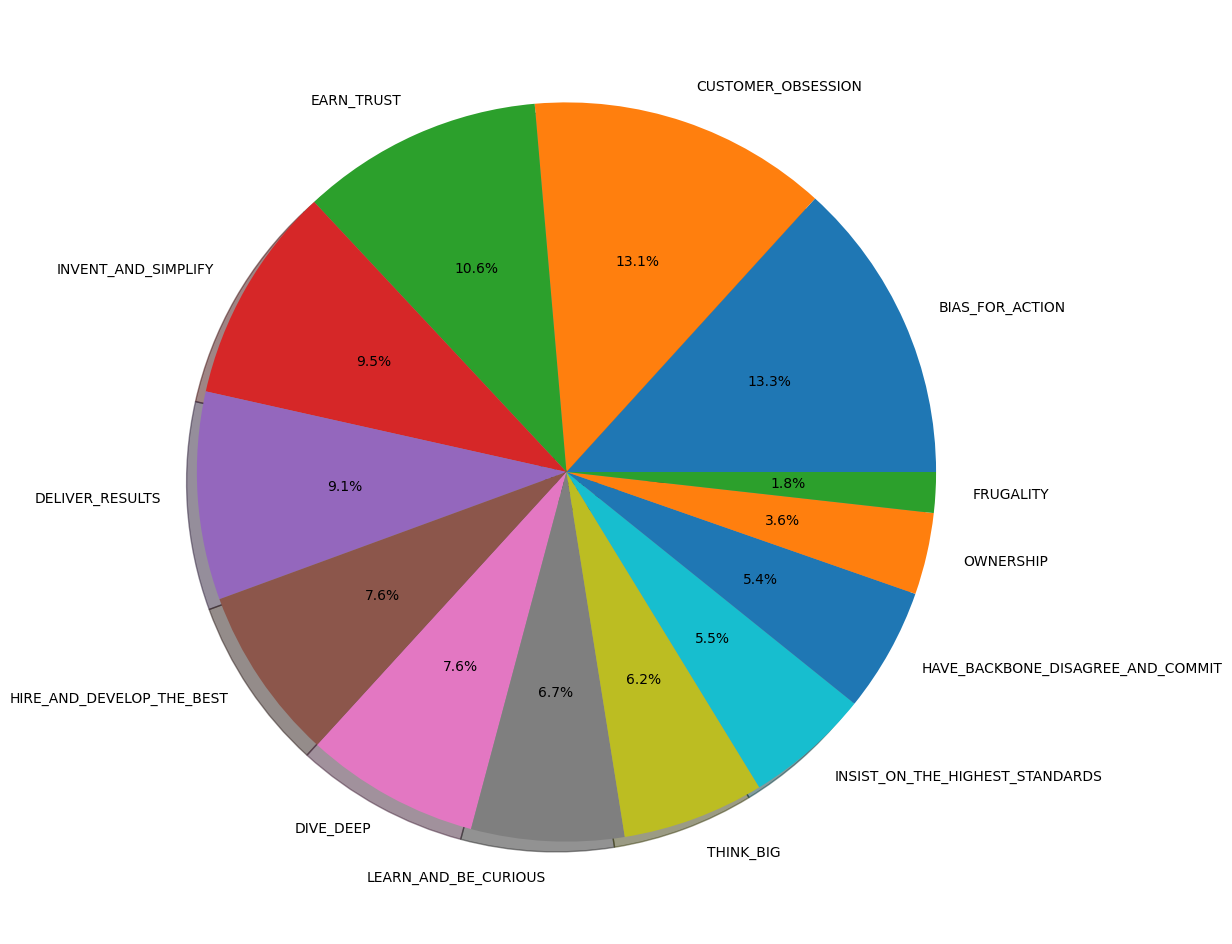

In [38]:
import matplotlib.pyplot as plt
# Create a pie chart

keys = []
values = []

for item in DECOMPOSE_RESPONSE_TO_LEADERSHIP_PRINCIPLES_SORTED:
    keys.append(item[0])
    values.append(item[1])

plt.figure(figsize=(12, 12))
plt.pie(values, labels=keys, autopct='%1.1f%%', shadow=True, startangle=0)
# Show the pie chart
plt.show()

In [39]:
import json
json.dumps(DECOMPOSE_RESPONSE_TO_LEADERSHIP_PRINCIPLES)

'{"CUSTOMER_OBSESSION": 13.11265413526152, "OWNERSHIP": 3.574935130872803, "INVENT_AND_SIMPLIFY": 9.539462909396605, "BIAS_FOR_ACTION": 13.258577337494035, "EARN_TRUST": 10.58830664320155, "LEARN_AND_BE_CURIOUS": 6.6821541044500234, "HIRE_AND_DEVELOP_THE_BEST": 7.629168931429644, "INSIST_ON_THE_HIGHEST_STANDARDS": 5.483133877907598, "THINK_BIG": 6.212706600215326, "FRUGALITY": 1.773590174199608, "DELIVER_RESULTS": 9.093113871248388, "DIVE_DEEP": 7.619685529411288, "HAVE_BACKBONE_DISAGREE_AND_COMMIT": 5.43251075491161}'

In [40]:
check_principles_promt =""" 
We asked a candidate an interview question. Here is the sumerized response: {candidate_response}

Context: we have different leadership principles that we want to evaluate the candidate response against.
Here is the list of leadership principles represented as a jason string. Key is the leadership principle and value 
is the definition of the leadership principle.
{leadership_principles}

Question : Is candidate response relevant to this leadership principles?.

Instructions:
1) Validate your answer by extracting the related text from the candidate response.
2) Use different validation text from response for different leadership principles. 
3) Use the format of principle name and your answer. 

For example, if you think the candidate response is relevant to the leadership principle "Customer Obsession", then your answer 
should look like "Customer Obsession": your answer."""

check_leadership_principle_prompt_template = PromptTemplate(
    input_variables =["candidate_response", "leadership_principles"],
    template = check_principles_promt
)

LEADERSHIP_PRINCIPLES_JSON = json.dumps(LEADERSHIP_PRINCIPLES)

validate_prompt = check_leadership_principle_prompt_template.format(
    candidate_response = summerized_text,
    leadership_principles = LEADERSHIP_PRINCIPLES_JSON)

print(llm(validate_prompt))                                         





Customer Obsession: Ahmed proposed a digital wallet with QR codes to address the issue of payments and, after discussing it with his team and senior stakeholders, was able to successfully launch the program. After six weeks, the pilot had exceeded expectations and the app was rolled out across all stores.
Ownership: Ahmed learned that having a bias for action was important, but also needed to anticipate edge cases and potential security concerns. He also suggested breaking stories down into a "start format" with a situation, two or three phases, and results for Amazon product interviews.
Bias for Action: Ahmed proposed a digital wallet with QR codes to address the issue of payments and, after discussing it with his team and senior stakeholders, was able to successfully launch the program. After six weeks, the pilot had exceeded expectations and the app was rolled out across all stores.
Invent and Simplify: He also suggested breaking stories down into a "start format" with a situation

In [41]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
import io
from PIL import Image

import base64

def coach_gpt_ui(behavioral_interview_question, candidate_response):
    # Generate data for the pie chart
    labels = ['A', 'B', 'C', 'D']
    sizes = np.random.randint(1, 10, size=4)
    
    # Create the pie chart
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    
    # Convert the plot to a base64 encoded string
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    
    # Return the outputs
    return behavioral_interview_question, candidate_response, image_base64


coach_gpt_gradio_ui = gr.Interface(
        fn=coach_gpt_ui,
        inputs=['text','text'],
        outputs=[gr.Textbox(label= 'General Evaluation'), 
                 gr.Textbox(label= 'Considering Different Leadership Principles'), 
                 gr.Image(label="Decompisition your response to leadership principles and relative importance using cosine similarity")],
    )
demo.launch()

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----

To create a public link, set `share=True` in `launch()`.
